In [256]:
from google.colab import files

In [257]:
uploaded = files.upload()

Saving cleaned_df (1).xlsx to cleaned_df (1) (8).xlsx


In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

In [302]:
df = pd.read_excel('cleaned_df (1).xlsx')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   pathrise_status              2544 non-null   object
 1   primary_track                2544 non-null   object
 2   cohort_tag                   2544 non-null   object
 3   program_duration_days        2544 non-null   int64 
 4   placed                       2544 non-null   int64 
 5   employment_status            2544 non-null   object
 6   highest_level_of_education   2544 non-null   object
 7   length_of_job_search         2544 non-null   object
 8   biggest_challenge_in_search  2544 non-null   object
 9   professional_experience      2544 non-null   object
 10  work_authorization_status    2544 non-null   object
 11  number_of_interviews         2544 non-null   int64 
 12  number_of_applications       2544 non-null   int64 
 13  gender                       2544

In [303]:
cleaned_df = df.drop(columns= ['cohort_tag', 'cohort_tag_month', 'cohort_tag_fortnight'])

In [305]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   pathrise_status              2544 non-null   object
 1   primary_track                2544 non-null   object
 2   program_duration_days        2544 non-null   int64 
 3   placed                       2544 non-null   int64 
 4   employment_status            2544 non-null   object
 5   highest_level_of_education   2544 non-null   object
 6   length_of_job_search         2544 non-null   object
 7   biggest_challenge_in_search  2544 non-null   object
 8   professional_experience      2544 non-null   object
 9   work_authorization_status    2544 non-null   object
 10  number_of_interviews         2544 non-null   int64 
 11  number_of_applications       2544 non-null   int64 
 12  gender                       2544 non-null   object
 13  race                         2544

In [306]:
cleaned_df.drop(df[df['placed'] ==0 ].index,inplace=True )

In [307]:
cleaned_df.drop(columns= ['placed'], inplace=True)

In [309]:
x = cleaned_df.drop(columns= ['program_duration_days'])

In [288]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 4 to 2534
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   pathrise_status              956 non-null    object
 1   primary_track                956 non-null    object
 2   employment_status            956 non-null    object
 3   highest_level_of_education   956 non-null    object
 4   length_of_job_search         956 non-null    object
 5   biggest_challenge_in_search  956 non-null    object
 6   professional_experience      956 non-null    object
 7   work_authorization_status    956 non-null    object
 8   number_of_interviews         956 non-null    int64 
 9   number_of_applications       956 non-null    int64 
 10  gender                       956 non-null    object
 11  race                         956 non-null    object
dtypes: int64(2), object(10)
memory usage: 97.1+ KB


In [310]:
x

,pathrise_status,primary_track,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
4,Placed,SWE,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10,100,Male,East Asian or Asian American
23,Placed,PSO,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,5,4,Male,Non-Hispanic White or Euro-American
30,Placed,SWE,Student,Master's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0,1,Male,East Asian or Asian American
39,Placed,SWE,Employed Full-Time,Master's Degree,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,4,15,Male,Native American or Alaskan Native
54,Placed,SWE,Student,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,F1 Visa/OPT,0,30,Female,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...
2527,Placed,SWE,Student,Bachelor's Degree,1-2 months,Figuring out which jobs to apply for,Less than one year,Citizen,6,6,Male,South Asian or Indian American
2528,Placed,Design,Student,Doctorate or Professional Degree,Less than one month,Technical interviewing,5+ years,Other,6,45,Male,Decline to Self Identify
2531,Placed,SWE,Unemployed,Doctorate or Professional Degree,Less than one month,Technical skills,1-2 years,F1 Visa/OPT,0,6,Female,East Asian or Asian American
2533,Placed,Design,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,0,9,Male,Non-Hispanic White or Euro-American


In [311]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = x.apply(le.fit_transform)

In [312]:
# Separate features (X) and target (y)
y = cleaned_df['program_duration_days']
X =x

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [314]:
lr = LinearRegression()

In [315]:
lr.fit(X_train,y_train)

LinearRegression()

In [316]:
# print the intercept(b0)
print(lr.intercept_)

213.75648401355744


In [317]:
# print the coefficients(b1, b2, ...)
print(lr.coef_)

[ 0.         -3.16166554 -2.87013896 -0.35195676  2.01047795 -1.84612504
 -1.49099853 -3.58457457 -3.76799015 -0.11922295  1.45902617 -2.95804725]


In [318]:
# Prediction
predictions = lr.predict(X_test)
predictions

array([164.43599608, 158.61464982, 168.11866897, 169.83126643,
       181.63214078, 125.74636456, 181.37256522, 171.83716172,
       138.35024537, 159.16295106, 180.74970657, 141.02629635,
       160.76474765, 164.74336437, 179.88274006, 153.02575562,
       142.73237909, 161.50740299, 137.81320366, 180.74591229,
       169.29066479, 161.64977342, 162.75594088, 168.18974066,
       151.51624197, 159.59390001, 169.51841821, 173.00694468,
       166.00967097, 145.74602317, 122.73223943, 162.33673756,
       147.67213426, 167.01028792, 168.42886507, 166.25309803,
       144.56765459, 169.32161576, 168.7849688 , 166.11225326,
       164.04144823, 161.29304857, 152.73961446, 136.2622433 ,
       122.81364652, 150.28913592, 168.43414005, 167.83507624,
       159.50149251, 167.35394872, 169.80399053, 179.24576856,
       162.54067181, 137.83546586, 155.68865855, 160.83237333,
       146.40753388, 173.63860705, 177.47004463, 171.64452562,
       164.79759723, 170.97133856, 122.41634458, 201.16

<Axes: xlabel='program_duration_days'>

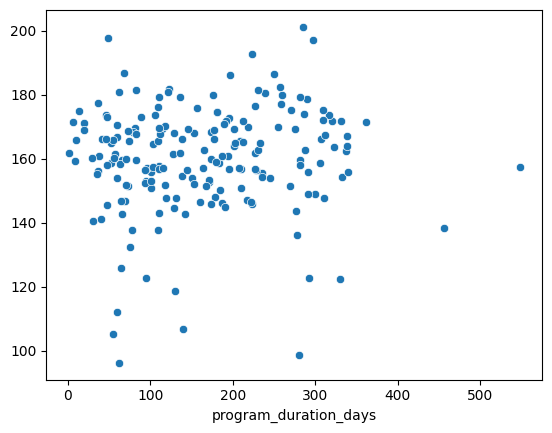

In [319]:
sns.scatterplot(x=y_test, y=predictions)

In [320]:
residual= y_test-predictions

<ipython-input-321-90a96fcef58f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50);


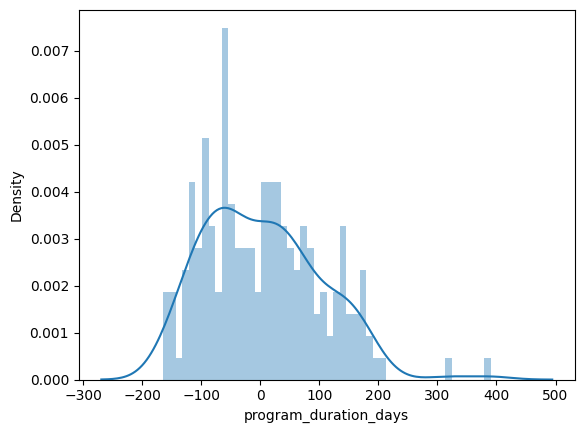

In [321]:
sns.distplot(residual,bins=50);

In [322]:
print('MAE:', mean_absolute_error(y_test, predictions))

MAE: 80.73265779726836
